<a href="https://colab.research.google.com/github/JMPNascimento/CIS_Trainee_Program/blob/main/Atividade_Clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudo de caso**

Este notebook é um estudo de caso sobre técnivas de aprendizado não supervisionado, com enfoque em métodos de clusterização por meio do algoritmo K-means. Faremos uso do dataset *Student Habits vs Academic Performance*, o qual possui atributos de análise(hábitos estudantis), como tempo de estudo, tempo de sono, "nível" de saúde mental, entre outos, e um atributo-alvo (nota de prova). Por meio dele, faremos clusters de estudantes, por meio de seus hábitos, e veremos o desempenho acadêmico de cada.

## Metodologia

Para resolvermos esse caso e compreender suas nuâncias, seguiremos com as seguintes abordagens:

\


1.   Apenas com a observação dos dados por meio de tabelas e dataframe,
apresentaremos hipóteses iniciais.

2.   Realizaremos uma EDA da forma que julgarmos mais adequada.

3.   Com base na EDA realizada, revisaremos as hipóteses a respeito do dados.

4.   Construiremos um algoritmo de K-Means "from scratch".

5.   Apresentaremos um método para justificar o valor de K utilizado.

6.   Por fim, revisaremos as hipóteses iniciais, e com base no algoritmo desenvolvido, apresentaremos uma análise crítica a respeito das informações extraídas dos dados caso o algoritmo refute ou confirme nossas hipóteses.

\

Tal abordagem procura desenvolver a capacidade de construir interpretações de dados multidimensionais e compreender a lógica por trás do K-Means.

---

Aqui, montamos o drive, no qual o conjunto de dados está armazenado , importamos as bibliotecas utilizidas e carregamos o dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importa as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Carrega o dataset
df = pd.read_csv('/content/drive/MyDrive/Data_Frames/student_habits_performance.csv', sep=',')

## Considerações Iniciais

---

Para tirarmos as nossas primeiras conclusões acerca desse conjunto de dados, utilizaremos somente a função head(), a qual nos mostrará as 10 primeiras tuplas do dataset, que nos dará uma vaga ideia do tipo de aluno que atinge as maiores notas.

In [3]:
# Apresenta as 10 primeiras tuplas do dataset
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


Com base na tabela acima, podemos, inicialmente, inferir que os hábitos estudantis (atributos) mais impactantes na nota de um aluno são:

\

*   study_hours_per_day

*   sleep_hours

*   diet_quality

*   mental_health_rating

\

Obviamente, não podemos concluir, com base numa breve visualização de dados, quais são as categorias com maior impacto em nosso alvo. Portanto, é recomendado tomar uma abordagem mais exploratória do conjunto, a fim de tirarmos nossas conclusões.

---

## Análise Exploratória de Dados

---

A Análise Exploratória de Dados é uma etapa inicial e fundamental da ciência de dados, que consiste em examinar, resumir e visualizar um conjunto de dados com o objetivo de entender sua estrutura, identificar padrões, detectar outliers, testar hipóteses e verificar suposições que podem influenciar análises futuras. Para isso, seguiremos a seguinte etapa nesse estudo de caso:

\

1.   Compreender a estrutura dos dados (tipos, quantidades e qtde. de nulos).

2.   Sumarizar os dados (dados estatísticos e distribuições).

3.   Identificar padrões e relações (correlação e tendências).

4.   Com base no supracitado, gerar hipóteses.

---

Funções da biblioteca Pandas como, info(), duplicate(), isnull() e descrbie() são fundamentais para compreendermos nossos dados, pois, esses métodos nos dão o norte para o qual seguiremos a fim de como manipular/tratar/interpretar o dataset utilizado.

\

A seguir, segue o uso de tais funções e seus resultados.

In [4]:
# Verifica os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
# Verifica se há tuplas duplicadas
duplicates_count = df.duplicated().sum()

# Verifica se há valores nulos em uma determinada coluna
missing_values = df.isnull().sum()

# Combina em um único DataFrame
pd.DataFrame({
    'Missing Values': missing_values,
    'Total Duplicates (Rows)': [duplicates_count] + [None] * (len(df.columns) - 1)
})

,Missing Values,Total Duplicates (Rows)
student_id,0,0.0
age,0,NaN
gender,0,NaN
study_hours_per_day,0,NaN
social_media_hours,0,NaN
netflix_hours,0,NaN
part_time_job,0,NaN
attendance_percentage,0,NaN
sleep_hours,0,NaN
diet_quality,0,NaN


In [6]:
# Descreve estatisticamente os atributos numéricos
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Com esse novo conhecimento, podemos iniciar a exploração dos dados, sabendo como utilizá-los de maneira mais apropriada. Vale ressaltar que, por mais que "parental_education_level" apareça com 91 dados faltantes, isso advém do uso do termo "None" como designar um parente que não terminou sua educação escolar.

---

Primeiramente, faremos duas coisas antes de prosseguir com a EDA. Nós iremos cortar o atributo "student_id", pois esse serve apenas como um identificador dos estudantes do dataset e não de fato impacta nos nossos dados. Também definiremos quais são as categorias categóricas e quais são as categorias numéricas, para termos acesso rápido a elas quando tivermos q usá-las.

In [7]:
# Retira 'student_id' dos dados
df = df.drop(columns=['student_id'], errors='ignore')

In [8]:
# Define quais são as categorias categóricas
cat_features = df.select_dtypes(include=["object"]).columns.tolist()

# Define quais são as categorias numéricas
num_features = df.select_dtypes(exclude=["object"]).columns.difference(["exam_score"]).tolist()

---

Após definir qual categoria é qual, agrupamos ambas pelo método groupby() e tiramos a média de exam score por combinação de atributos. Isso é feito para vermos quais são os valores mais recorrentes de cada categoria, a fim de encontrarmos um padrão.

In [9]:
# Agrupamento de dados
grouped = df.groupby(cat_features + num_features)['exam_score'].mean().reset_index()

sort_values() é então invocado para os dados serem ordenados (do maior exam_score para o menor), ajudando na visualização.

In [10]:
# Ordenação dos dados
top_combinations = grouped.sort_values(by='exam_score', ascending=False)

# Apresenta as 50 primeiras tuplas do agrupamento
top_combinations.head(50)

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation,age,attendance_percentage,exercise_frequency,mental_health_rating,netflix_hours,sleep_hours,social_media_hours,study_hours_per_day,exam_score
9,Female,No,Fair,Bachelor,Average,No,20,92.5,5,9,1.3,8.1,1.6,6.0,100.0
325,Female,No,Poor,High School,Good,No,19,99.4,0,3,2.9,4.8,3.0,7.6,100.0
348,Female,Yes,Fair,Bachelor,Average,No,18,85.9,6,3,1.9,7.8,3.6,7.5,100.0
298,Female,No,Poor,Bachelor,Good,No,22,82.8,4,10,3.4,5.9,1.0,6.2,100.0
359,Female,Yes,Fair,Bachelor,Good,No,23,92.2,4,8,0.5,9.4,2.8,5.6,100.0
835,Male,Yes,Good,High School,Average,No,22,81.3,2,10,1.1,7.0,3.5,5.5,100.0
830,Male,Yes,Good,High School,Average,No,18,70.0,6,8,0.9,7.1,2.6,5.8,100.0
44,Female,No,Fair,Bachelor,Good,Yes,18,94.6,5,10,1.2,5.7,1.6,7.4,100.0
37,Female,No,Fair,Bachelor,Good,No,22,94.5,5,8,2.3,8.2,3.5,6.2,100.0
436,Male,No,Fair,Bachelor,Average,No,20,77.5,4,7,0.0,7.1,2.0,5.6,100.0


Com base no acima, verifica-se que "study_hours_per_day", "sleep_hours" e "mental_health_rating" realmente possuem grandes impactos positivos em "exam_score". Porém, vemos que "diet_quality" não é tão relevante quanto foi sugerido pela visualização por meio de head(). Também conclui-se que "part_time_job", "extracurricular_participation", "netflix_hours" e "social_media_hours" possuem comportamento inverso à "exam_score", enquanto "attendance_percentage" e "exercise_frequency" aparecem como novas categorias que afetam positivamente nosso alvo.

---

Aqui, montamos uma função para discretizar os nossos dados. Fazemos isso, pois, possuímos dados do tipo int64 e, principalmente, float64 dos mais cariados tipos. Isso torna uma visualização direta dos dados por meio desses vários e vários valores inviáveis, assim, o discretizamos em quartis (decisão de projeto).

In [11]:
#Discretização de dados
def bin_numeric_columns(df, columns, labels=['low', 'mid-low', 'mid-high', 'high']):
    binned_df = df.copy()

    for col in columns:
        try:
            q1 = df[col].quantile(0.25)
            q2 = df[col].quantile(0.50)
            q3 = df[col].quantile(0.75)
            min_val = df[col].min()
            max_val = df[col].max()

            bins = [min_val, q1, q2, q3, max_val]
            binned_col_name = f"{col}_bin"
            binned_df[binned_col_name] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

        except Exception as e:
            print(f"Skipping {col} due to error: {e}")

    return binned_df

Feita a função, os dados são discretizados.

In [12]:
# Discretiza as catehorias numéricas do dataset
numeric_binned = bin_numeric_columns(df, num_features)

---

Agora, montamos um gráfico comparativo do tipo Atributo X Atributo-Alvo, para termos uma melhor representação do comportamento das categorias. Assim, podemos ver quais das conclusões feita pela interpretação de "top_combinations" batem com as dos gráfcios.



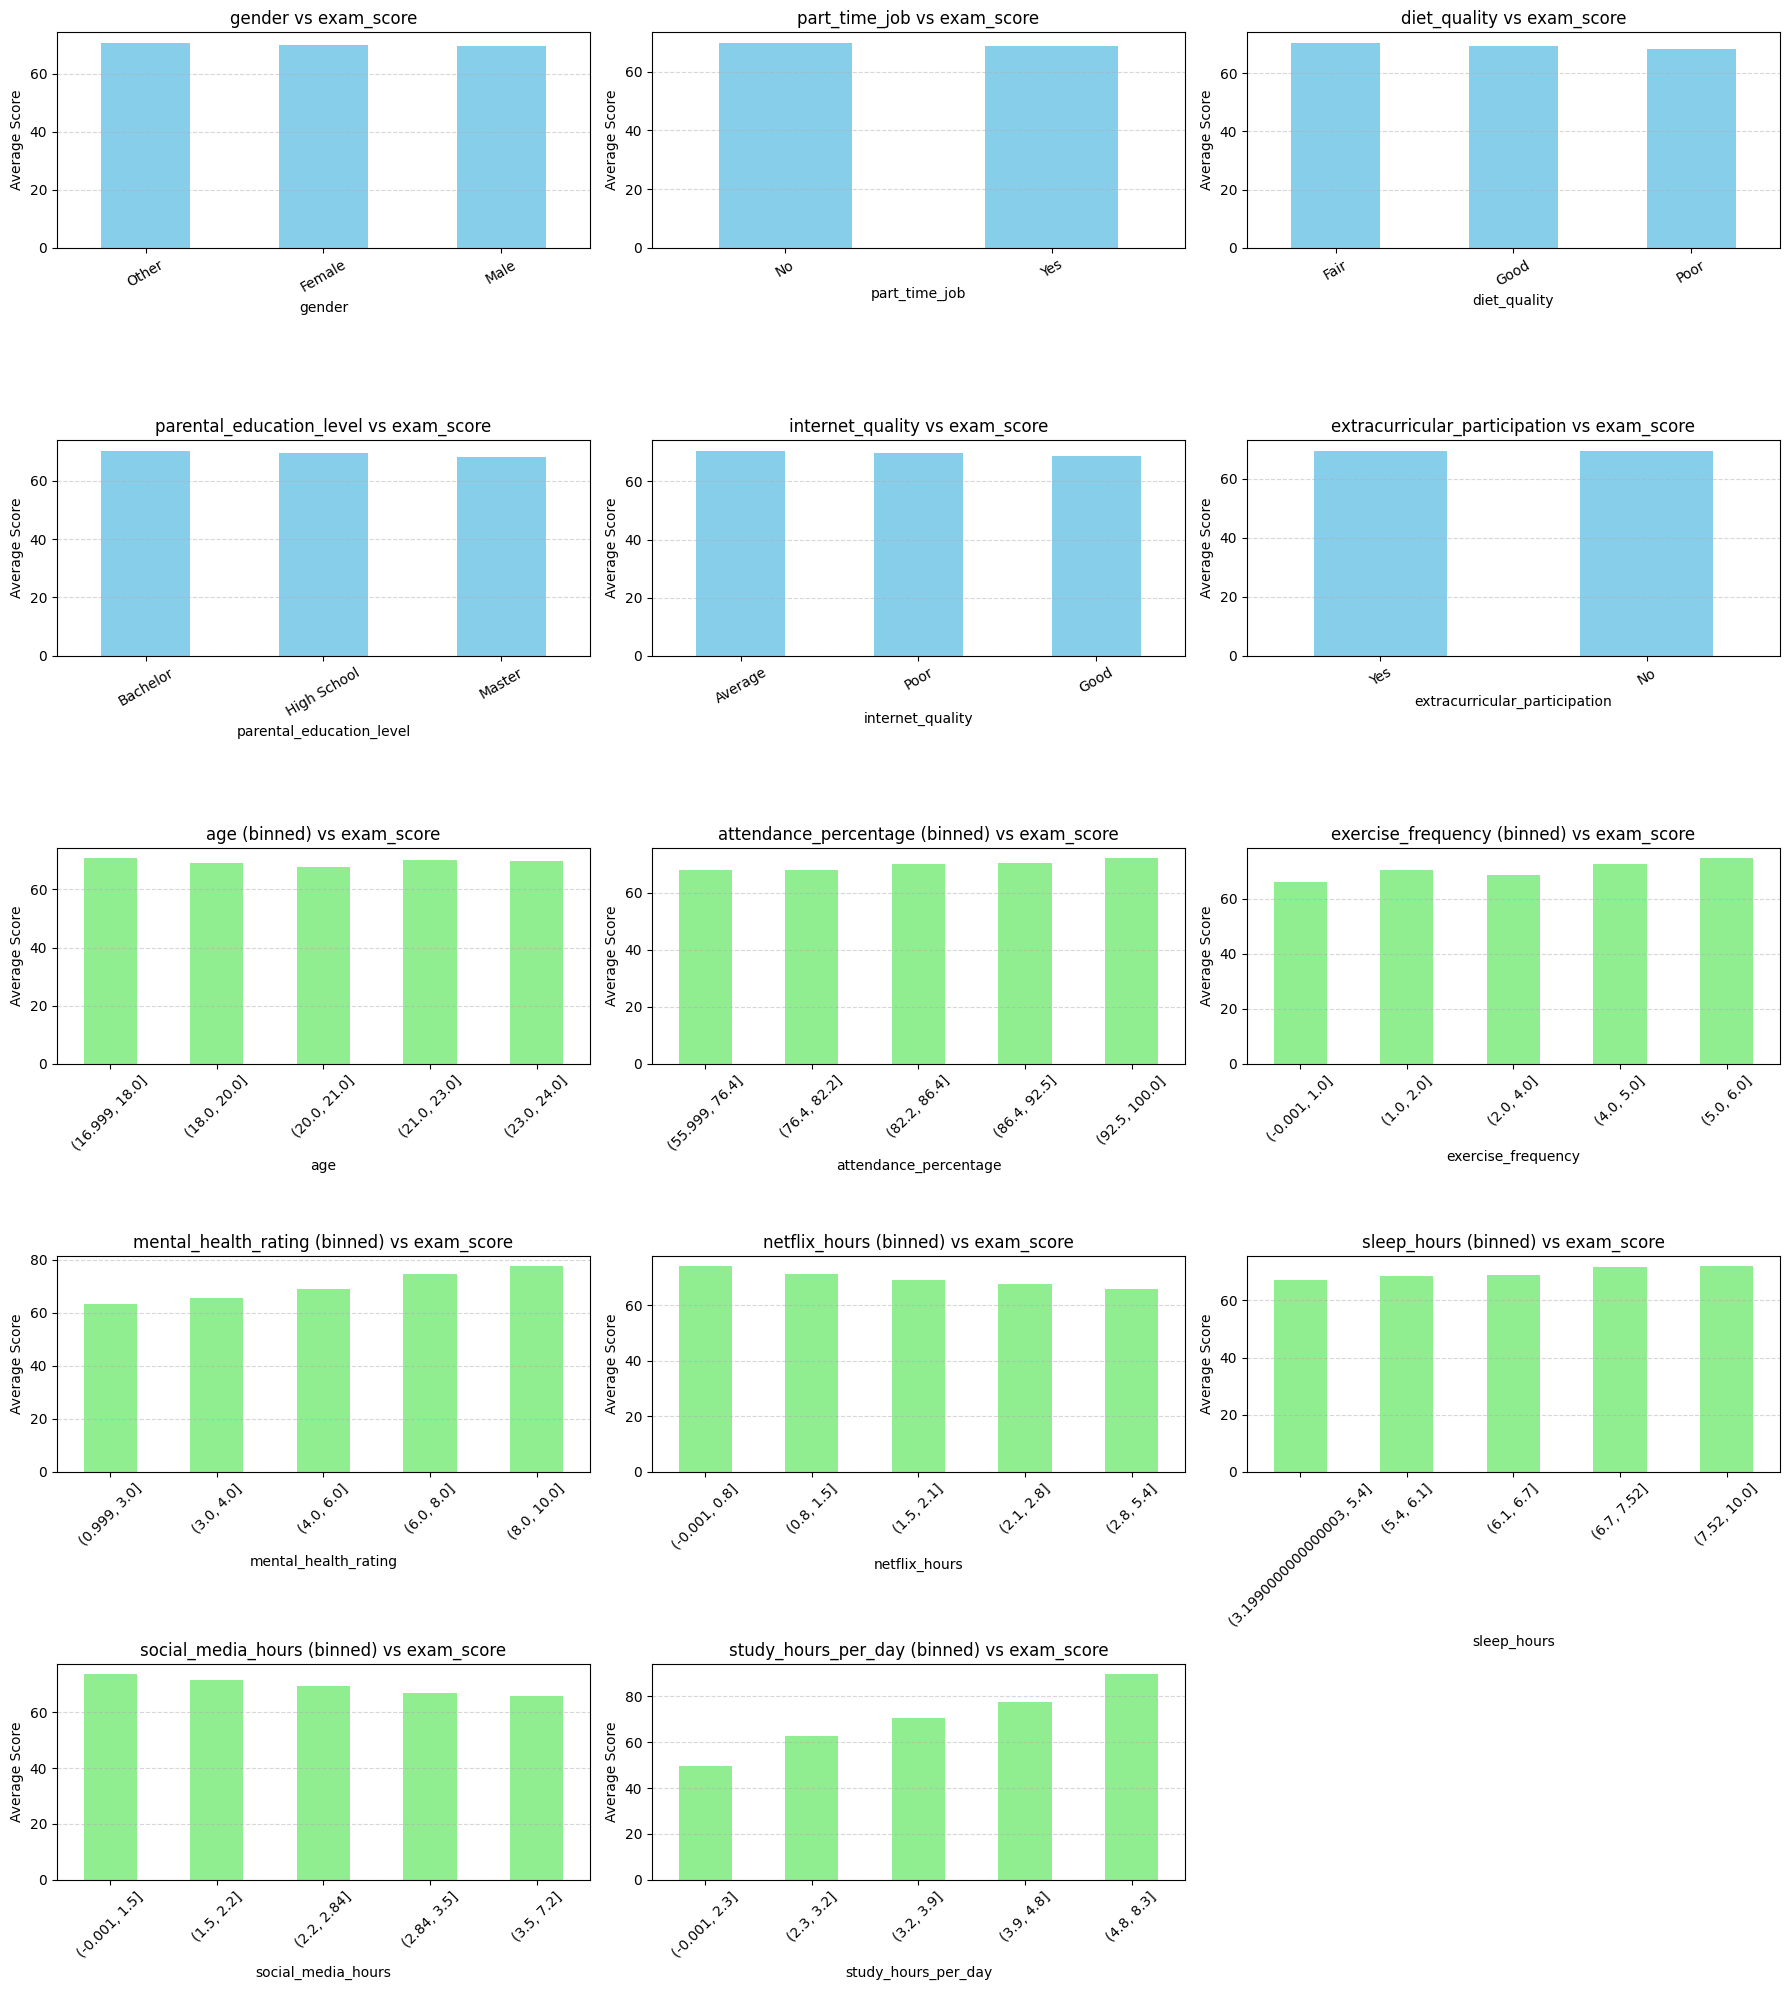

In [13]:
total_features = len(cat_features) + len(num_features)
cols = 3
rows = (total_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Plota atributos categóricas
for i, feature in enumerate(cat_features):
    means = df.groupby(feature)['exam_score'].mean().sort_values(ascending=False)
    means.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature} vs exam_score')
    axes[i].set_ylabel('Average Score')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Plota atributos numéricos (discretizado por quartils)
for j, feature in enumerate(num_features):
    idx = j + len(cat_features)
    try:
        binned = pd.qcut(df[feature], q=5, duplicates='drop')
        means = df.groupby(binned, observed=False)['exam_score'].mean()
        means.plot(kind='bar', ax=axes[idx], color='lightgreen')
        axes[idx].set_title(f'{feature} (binned) vs exam_score')
        axes[idx].set_ylabel('Average Score')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', linestyle='--', alpha=0.5)
    except Exception as e:
        axes[idx].set_visible(False)
        print(f'Skipped {feature} due to: {e}')

# Esconde subplots não utilizados
for k in range(total_features, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.show()

Por esses gráficos, vemos que os atributos categóricos não possuem tanto peso quanto os numéricos e nossas hipóteses acerca de quais atributos parecem ter o maior impacto, seja positivo ou negativo, aparentam estar corretas.

---

Por último, vamos utilizar da Informação Mútua para averiguar, mais uma vez, as hipóteses geradas. Contextualizando, Informação Mútua é um conceito da teoria da informação que mede o grau de dependência entre duas variáveis, quantificando o quanto saber o valor de uma variável reduz a incerteza sobre a outra. Para isso, devemos primeiro pré-processar nossos dados.

In [14]:
# Para atributos numéricas
num_transformer = StandardScaler()
X_num = num_transformer.fit_transform(df[num_features])
X_num_df = pd.DataFrame(X_num, columns=num_features)

# Para atributos categóricas (utilizamos label encoder para manter nome das colunas)
X_cat_df = df[cat_features].copy()
for col in cat_features:
    X_cat_df[col] = pd.factorize(X_cat_df[col])[0]

# Combina as categorias transformadas
X_preprocessed = pd.concat([X_num_df, X_cat_df], axis=1)

Dividimos o dataset em dois, um contendo as categorias de análise e o outro apenas a categoria-alvo.

In [15]:
# Divisão do dataset
X = df.drop(['exam_score'], axis=1)
y = df['exam_score']

E chamamos a função mutual_info_regression() para calcular a Informação Mútua, averiguando o quanto "exam_score" é afetado por cada.

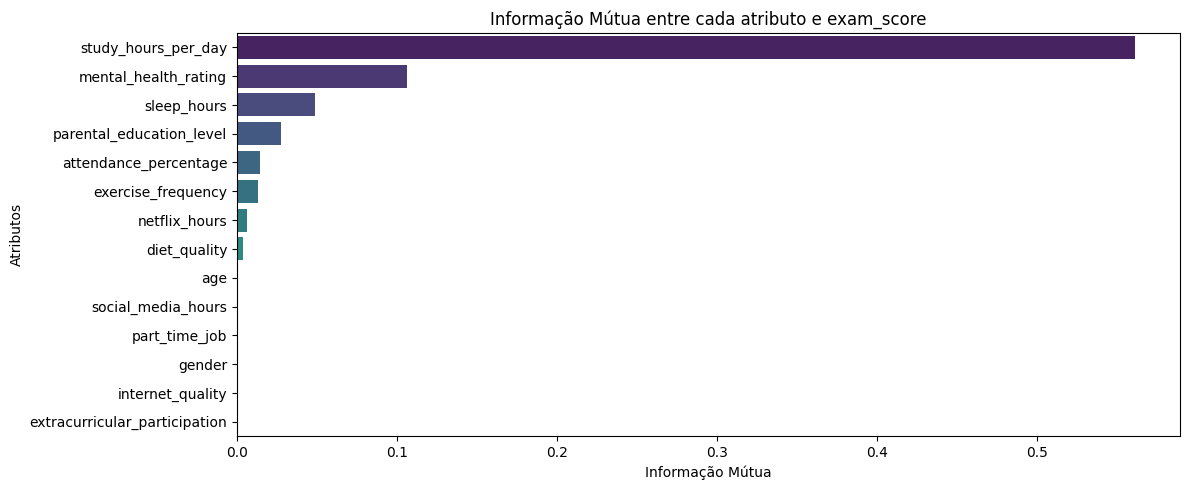

In [16]:
# Informação Mútua
mi_scores = mutual_info_regression(X_preprocessed, y)
mi_df = pd.DataFrame({
    'Atributos': X_preprocessed.columns,
    'Informação Mútua': mi_scores
}).sort_values(by='Informação Mútua', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Informação Mútua', y='Atributos', hue='Atributos', data=mi_df, palette='viridis', legend=False)
plt.title('Informação Mútua entre cada atributo e exam_score')
plt.tight_layout()
plt.show()

Tendo essa última análise, podemos fechar nossas hipóteses iniciais da seguinte formas "study_hours_per_day" é sem dúvida a categoria mais importante que define um "exam_score". "mental_health_rating", "sleep_hours", "exercise_frequency" e "attendance_percentage" támbem afetam consideravelmente o resultado final. Apenas não consideramos "parental_education_level" pois é um atributo categórico com vários valores únicos que não demonstrou importância até agora, portanto, sua aparição aqui é muito provavelmente ruído.

---

## K-Means

---

O K-Means é um algoritmo de aprendizado não supervisionado usado para clustering, o qual divide um conjunto de dados em k grupos distintos, com base na similaridade entre os pontos, geralmente medida pela distância euclidiana. É por meio dele que será feita a averiguação de nossas hipóteses.

---

Primeiro, vamos adicionar "exam_score" de volta, mas agora, nos dados processados

In [17]:
# Adiciona exam_score nos dados processados para atividades de clusterização
df_encoded = X_preprocessed.copy()
df_encoded['exam_score'] = df['exam_score']

---

Aqui, montamos um algoritmo K-Means "from scratch". Note que temos quatro pontos fundamentais aqui, os quais são:

\

*    Inicialização aleatória dos centróides.

*    Atribuição de pontos aos clusters.

*    Recálculo dos centróides.

*    Repetição de recálculo até convergir ou atingir o limite de iterações.

In [18]:
# Clusterização por K-means
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
      self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

      for _ in range(self.max_iters):
          labels = self._assign_labels(X)
          new_centroids = self._update_centroids(X, labels)
          if np.allclose(self.centroids, new_centroids):
              break
          self.centroids = new_centroids

      self.labels_ = labels
      self.inertia_ = np.sum((X - self.centroids[labels])**2)

    def _assign_labels(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

---

Antes de prosseguirmos com a instancição do K-Means, utilizamos do Método do Cotovelo para definir qual é o valor de 'k' mais apropriado.

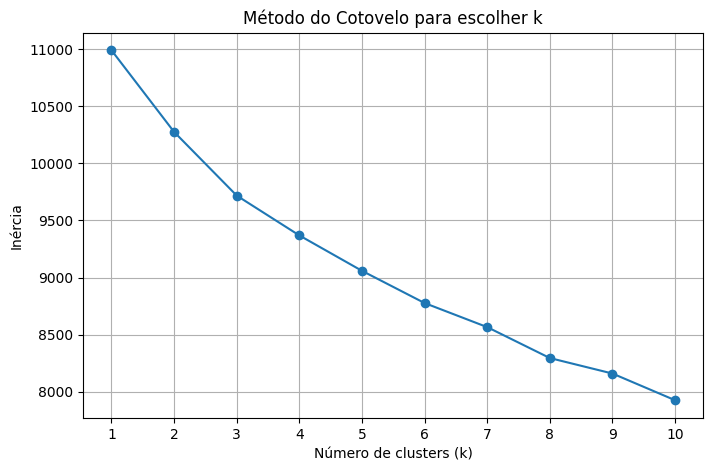

In [19]:
# Acumula os vários 'k's
inertias = []
k_values = range(1, 11)
X_cluster = df_encoded.drop('exam_score', axis=1).values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plota o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Método do Cotovelo para escolher k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.xticks(k_values)
plt.show()

Nota-se que a inércia cai rapidamente entre k = 1 e k = 3, com a partir de k = 4, a queda vai se tornando mais gradual. Isso indica que o "cotovelo" está mais visível em k = 3, indicando-o como a escolha ideal.

---

Agora, fazemos a clusterização e plotamos dois gráficos para visualizarmos como cada grupo se sai no "exam_score".

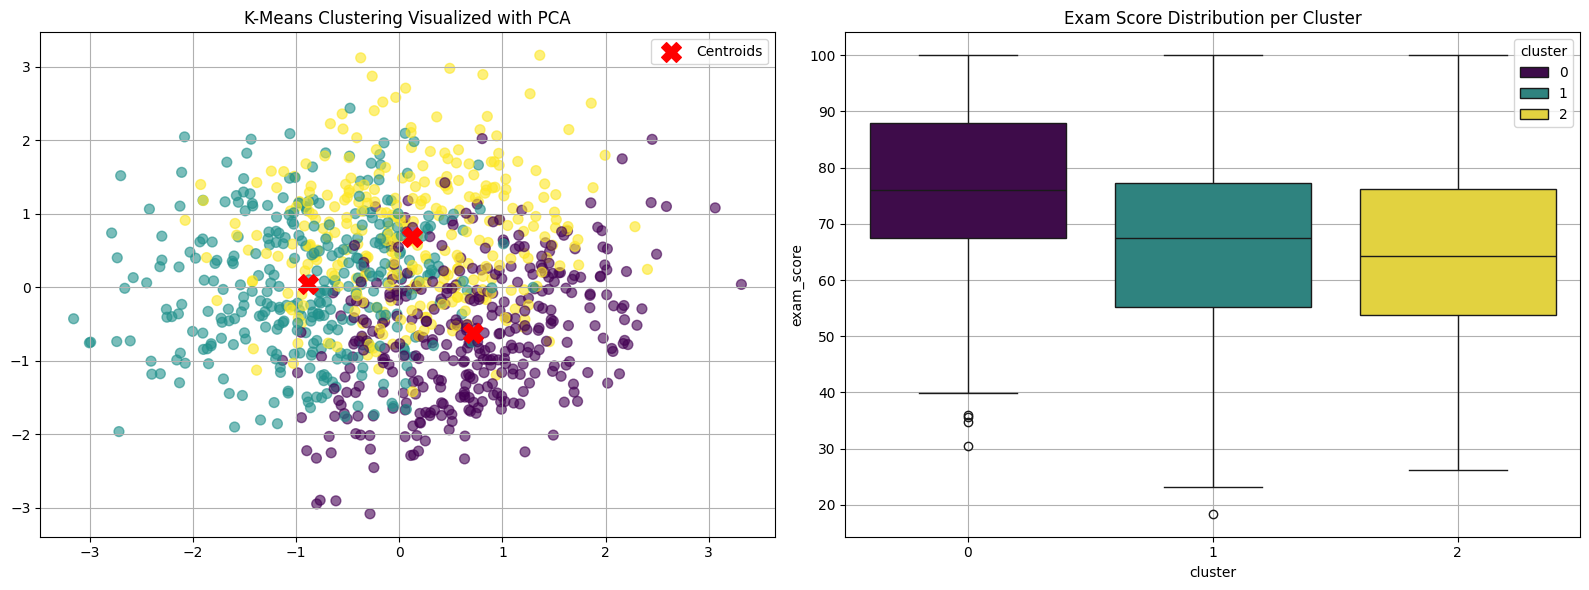

In [45]:
# Clusterização
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster)

df['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
centroids_pca = pca.transform(kmeans.centroids)

# Visualização de PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[0].set_title("K-Means Clustering Visualized with PCA")
axes[0].legend()
axes[0].grid(True)

sns.boxplot(x="cluster", y="exam_score", hue="cluster", data=df, palette="viridis", ax=axes[1], dodge=False)
axes[1].set_title("Exam Score Distribution per Cluster")
axes[1].grid(True)

plt.tight_layout()
plt.show()

---

Para um olhar mais detalhado, montamos uma tabela com as médias de cada cluster, a fim de julgarmos nossas hipóteses.

In [46]:
# Adiciona componentes PCA ao dataset
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Cópia do dataset com atributos categóricos numericamente convertidos
df_numeric = df.copy()
for col in cat_features:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

# Apresenta médias de cada cluster
summary = df_numeric.groupby("cluster").mean().T
display(summary.round(2))

cluster,0,1,2
age,20.06,20.89,20.59
gender,0.55,0.53,0.61
study_hours_per_day,3.59,3.85,3.19
social_media_hours,2.49,2.66,2.35
netflix_hours,1.80,1.71,1.95
part_time_job,0.24,0.19,0.22
attendance_percentage,84.31,84.29,83.76
sleep_hours,6.50,6.43,6.48
diet_quality,0.84,0.71,0.69
exercise_frequency,3.36,1.08,4.76


Conforme a Informação Mútua havia nos mostrado, "study_hours_per_day" e "mental_health_rating" são os atributos mais imopactantes no resultado final. Veja também que "sleep_hours" e "exercise_frequency" também afetam consideravelmente o atrbuto-alvo. Em suma, o algoritmo K-Means comprova as hipóteses finais que desenvolvemos ao final de nossa EDA.

---